# Market Basket Analysis (MBA): Filter item sets
* mlxtend apriori: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/scikitlearn_tutorial
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

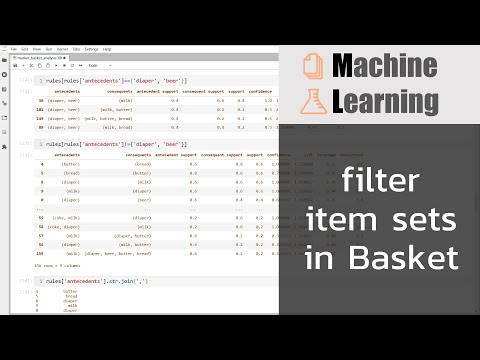

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('wpihOMpuCFQ', width=720, height=405)

In [2]:
import pandas as pd

import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas    version: {pd.__version__}')
print(f'mlxtend   version: {mlxtend.__version__}')

pandas    version: 1.1.3
mlxtend   version: 0.18.0


In [4]:
pd.Timestamp.now()

Timestamp('2020-12-09 08:30:16.776002')

## read data

In [5]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/basket_items.csv'
data=pd.read_csv(url)
data[:5]

,trans,items
0,1,butter|bread|coke
1,2,bread|butter
2,3,beer|diaper|milk
3,4,beer|bread|butter|diaper|milk
4,5,coke|diaper|milk|bread


In [6]:
basket=data['items'].str.get_dummies('|').astype(pd.SparseDtype("bool"))
basket[:5]

,beer,bread,butter,coke,diaper,milk
0,False,True,True,True,False,False
1,False,True,True,False,False,False
2,True,False,False,False,True,True
3,True,True,True,False,True,True
4,False,True,False,True,True,True


## find frequent item sets

In [7]:
frequent_itemsets = apriori(basket, min_support = 0.1, use_colnames = True)

# frequent_itemsets['support_n']=frequent_itemsets['support']*len(basket)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets
1,0.8,(bread)
2,0.6,(butter)
4,0.6,(diaper)
5,0.6,(milk)
19,0.6,"(milk, diaper)"
10,0.6,"(bread, butter)"
0,0.4,(beer)
11,0.4,"(bread, coke)"
25,0.4,"(beer, milk, diaper)"
31,0.4,"(bread, milk, diaper)"


## rules and metrices

In [8]:
# metrices = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

metric='lift'
# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
# rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .5)
rules = association_rules(frequent_itemsets, metric = metric, min_threshold = 1)

rules.sort_values('support', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
59,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, milk)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


## filter item sets (SET column)

In [9]:
rules.loc[4, 'antecedents']

frozenset({'bread'})

In [10]:
rules[rules['antecedents']=={'diaper'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
1,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
35,(diaper),"(beer, milk)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
53,(diaper),"(bread, milk)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
119,(diaper),"(bread, butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
97,(diaper),"(bread, beer, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
109,(diaper),"(butter, beer, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
130,(diaper),"(bread, milk, coke)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
155,(diaper),"(bread, beer, milk, butter)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
25,(diaper),"(butter, beer)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [11]:
rules[rules['antecedents']!={'diaper'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
51,"(bread, diaper)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
60,(milk),"(coke, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
59,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, milk)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [12]:
rules[~(rules['antecedents']=={'diaper'})]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
51,"(bread, diaper)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
60,(milk),"(coke, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
59,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, milk)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [13]:
rules[rules['antecedents']=={'diaper', 'beer'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,"(beer, diaper)",(milk),0.4,0.6,0.4,1.0,1.666667,0.16,inf
105,"(beer, diaper)","(butter, milk)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
93,"(beer, diaper)","(bread, milk)",0.4,0.4,0.2,0.5,1.250000,0.04,1.2
147,"(beer, diaper)","(bread, butter, milk)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6


In [14]:
rules[rules['antecedents']!={'diaper', 'beer'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
59,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, milk)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [15]:
rules['antecedents'].str.join(',')

4            bread
5           butter
8             milk
9           diaper
0             beer
          ...     
59     coke,diaper
58       coke,milk
57          diaper
56            milk
159         butter
Name: antecedents, Length: 160, dtype: object

In [16]:
# contains at least (diaper AND beer) OR others
# rules[rules['antecedents'] == {'beer', 'diaper'}] # equal
rules[rules['antecedents'].str.join(',').str.contains('(?=.*beer)(?=.*diaper)')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,"(beer, diaper)",(milk),0.4,0.6,0.4,1.0,1.666667,0.16,inf
99,"(butter, beer, diaper)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
105,"(beer, diaper)","(butter, milk)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
93,"(beer, diaper)","(bread, milk)",0.4,0.4,0.2,0.5,1.250000,0.04,1.2
147,"(beer, diaper)","(bread, butter, milk)",0.4,0.2,0.2,0.5,2.500000,0.12,1.6
133,"(bread, beer, diaper, butter)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
132,"(bread, beer, milk, diaper)",(butter),0.2,0.6,0.2,1.0,1.666667,0.08,inf
135,"(butter, beer, milk, diaper)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
137,"(bread, beer, diaper)","(butter, milk)",0.2,0.2,0.2,1.0,5.000000,0.16,inf
140,"(butter, beer, diaper)","(bread, milk)",0.2,0.4,0.2,1.0,2.500000,0.12,inf


In [17]:
# not contains at least (diaper AND beer) OR others
rules[~rules['antecedents'].str.join(',').str.contains('(?=.*beer)(?=.*diaper)')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
59,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
58,"(coke, milk)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
57,(diaper),"(butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [18]:
# contains diaper OR beer
rules[rules['antecedents'].str.join(',').str.contains('diaper|beer')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
1,(diaper),(beer),0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
51,"(bread, diaper)",(milk),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
35,(diaper),"(beer, milk)",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
...,...,...,...,...,...,...,...,...,...
63,"(bread, beer, butter)",(diaper),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
62,"(bread, beer, diaper)",(butter),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
61,(diaper),"(coke, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
59,"(coke, diaper)",(milk),0.2,0.6,0.2,1.000000,1.666667,0.08,inf


In [19]:
rules[rules['antecedents'].apply(lambda s: len(s))==1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(bread),(butter),0.8,0.6,0.6,0.750000,1.250000,0.12,1.6
5,(butter),(bread),0.6,0.8,0.6,1.000000,1.250000,0.12,inf
8,(milk),(diaper),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(diaper),(milk),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
0,(beer),(diaper),0.4,0.6,0.4,1.000000,1.666667,0.16,inf
...,...,...,...,...,...,...,...,...,...
61,(diaper),"(coke, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
60,(milk),"(coke, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
57,(diaper),"(butter, milk)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
56,(milk),"(butter, diaper)",0.6,0.2,0.2,0.333333,1.666667,0.08,1.2


In [20]:
rules[rules['antecedents'].apply(lambda s: len(s))==3]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
112,"(butter, milk, diaper)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
120,"(bread, milk, diaper)",(coke),0.4,0.4,0.2,0.5,1.250000,0.04,1.2
121,"(bread, milk, coke)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
122,"(bread, diaper, coke)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
123,"(coke, milk, diaper)",(bread),0.2,0.8,0.2,1.0,1.250000,0.04,inf
111,"(bread, butter, diaper)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
98,"(butter, beer, milk)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf
99,"(butter, beer, diaper)",(milk),0.2,0.6,0.2,1.0,1.666667,0.08,inf
100,"(butter, milk, diaper)",(beer),0.2,0.4,0.2,1.0,2.500000,0.12,inf
110,"(bread, butter, milk)",(diaper),0.2,0.6,0.2,1.0,1.666667,0.08,inf


In [21]:
rules[(rules['antecedents'].apply(lambda s: len(s))==1) & (rules['lift'] > 2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
107,(beer),"(butter, milk, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
157,(beer),"(bread, butter, milk, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
28,(beer),"(butter, milk)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
24,(beer),"(butter, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
83,(beer),"(bread, butter, milk)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
71,(beer),"(bread, butter, diaper)",0.4,0.2,0.2,0.5,2.5,0.12,1.6
